# 1. Import necessary libraries

In [105]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

# 2. Load Dataset

In [13]:
pd.set_option('display.max_rows',250)
glass = pd.read_csv('glass.csv')
glass.head(214)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.00,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.00,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.00,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.00,0.11,1


# 3. EDA/ Data Understanding

In [5]:
glass.shape

(214, 10)

In [8]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [9]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [10]:
glass['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

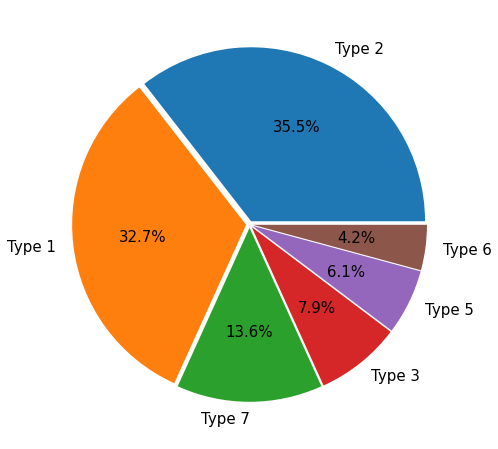

In [28]:
plt.figure(figsize=(8,8))
plt.pie(glass['Type'].value_counts(), labels=['Type 2','Type 1','Type 7','Type 3','Type 5','Type 6'], autopct='%1.1f%%', textprops={'fontsize':15}, explode=[0.02,0.02,0.02,0.02,0.02,0.02])
plt.show()

# 4. Data Transformation | 5. Model Building | 6. Model Training | 7. Model Evaluation

## 4.1 Without Scaling Data

In [131]:
X=glass.drop('Type',axis=1)
y=glass[['Type']]

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10,stratify=y)

In [95]:
X_train.shape,y_train.shape

((171, 9), (171, 1))

In [96]:
X_test.shape,y_test.shape

((43, 9), (43, 1))

In [115]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [116]:
y_pred=knn.predict(X_test)

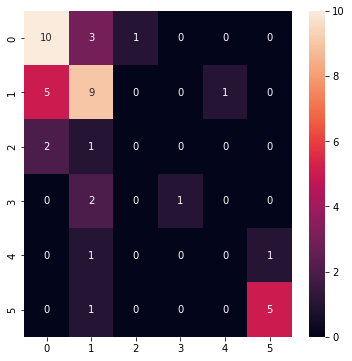

In [117]:
plt.figure(figsize=(6,6))
sn.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.show()

In [118]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.59      0.71      0.65        14
           2       0.53      0.60      0.56        15
           3       0.00      0.00      0.00         3
           5       1.00      0.33      0.50         3
           6       0.00      0.00      0.00         2
           7       0.83      0.83      0.83         6

    accuracy                           0.58        43
   macro avg       0.49      0.41      0.42        43
weighted avg       0.56      0.58      0.56        43



## 4.2 With Scaling

### 4.2.1 StandardScaler()

In [151]:
std=StandardScaler()
scaled = std.fit_transform(X)

In [152]:
X_train, X_test, y_train, y_test = train_test_split(scaled,y,test_size=0.2,random_state=10,stratify=y)

In [153]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [154]:
y_pred=knn.predict(X_test)

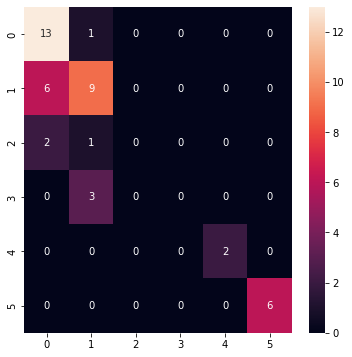

In [155]:
plt.figure(figsize=(6,6))
sn.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.show()

In [157]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.62      0.93      0.74        14
           2       0.64      0.60      0.62        15
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         6

    accuracy                           0.70        43
   macro avg       0.54      0.59      0.56        43
weighted avg       0.61      0.70      0.64        43



### 4.2.2 MinMaxScaler()

In [138]:
mnmx=MinMaxScaler()
scaled = mnmx.fit_transform(X)

In [139]:
X_train, X_test, y_train, y_test = train_test_split(scaled,y,test_size=0.2,random_state=10,stratify=y)

In [140]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [141]:
y_pred=knn.predict(X_test)

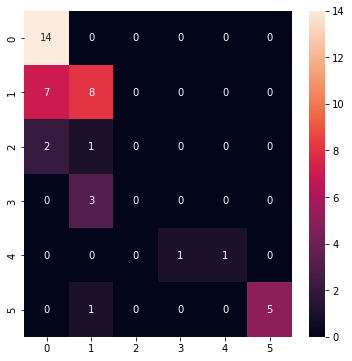

In [142]:
plt.figure(figsize=(6,6))
sn.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.show()

In [143]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.61      1.00      0.76        14
           2       0.62      0.53      0.57        15
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       1.00      0.50      0.67         2
           7       1.00      0.83      0.91         6

    accuracy                           0.65        43
   macro avg       0.54      0.48      0.48        43
weighted avg       0.60      0.65      0.60        43



### 4.2.3 RobustScaler()

In [144]:
robust=RobustScaler()
scaled = robust.fit_transform(X)

In [145]:
X_train, X_test, y_train, y_test = train_test_split(scaled,y,test_size=0.2,random_state=10,stratify=y)

In [146]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [147]:
y_pred=knn.predict(X_test)

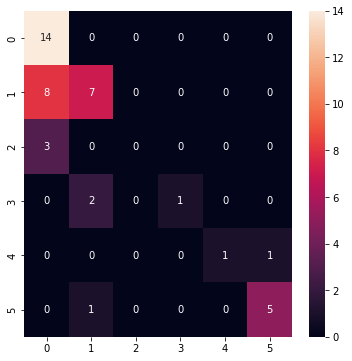

In [148]:
plt.figure(figsize=(6,6))
sn.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.show()

In [149]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.56      1.00      0.72        14
           2       0.70      0.47      0.56        15
           3       0.00      0.00      0.00         3
           5       1.00      0.33      0.50         3
           6       1.00      0.50      0.67         2
           7       0.83      0.83      0.83         6

    accuracy                           0.65        43
   macro avg       0.68      0.52      0.55        43
weighted avg       0.66      0.65      0.61        43



## To find best k value

In [163]:
neighbours = list(range(1,50,2))
cv_scores = []

for i in neighbours:
    #print(i)
    knn_model = KNeighborsClassifier(n_neighbors = i)
    cv_score  = cross_val_score(estimator = knn,X=scaled,y=y,cv=10)
    print(i,'-',cv_score.mean())
    cv_scores.append(cv_score.mean())

1 - 0.6632034632034632
3 - 0.6632034632034632
5 - 0.6632034632034632
7 - 0.6632034632034632
9 - 0.6632034632034632
11 - 0.6632034632034632
13 - 0.6632034632034632
15 - 0.6632034632034632
17 - 0.6632034632034632
19 - 0.6632034632034632
21 - 0.6632034632034632
23 - 0.6632034632034632
25 - 0.6632034632034632
27 - 0.6632034632034632
29 - 0.6632034632034632
31 - 0.6632034632034632
33 - 0.6632034632034632
35 - 0.6632034632034632
37 - 0.6632034632034632
39 - 0.6632034632034632
41 - 0.6632034632034632
43 - 0.6632034632034632
45 - 0.6632034632034632
47 - 0.6632034632034632
49 - 0.6632034632034632


In [159]:
cv_scores

[0.6632034632034632,
 0.6632034632034632,
 0.6632034632034632,
 0.6632034632034632,
 0.6632034632034632,
 0.6632034632034632,
 0.6632034632034632,
 0.6632034632034632,
 0.6632034632034632,
 0.6632034632034632,
 0.6632034632034632,
 0.6632034632034632,
 0.6632034632034632,
 0.6632034632034632,
 0.6632034632034632,
 0.6632034632034632,
 0.6632034632034632,
 0.6632034632034632,
 0.6632034632034632,
 0.6632034632034632,
 0.6632034632034632,
 0.6632034632034632,
 0.6632034632034632,
 0.6632034632034632,
 0.6632034632034632]

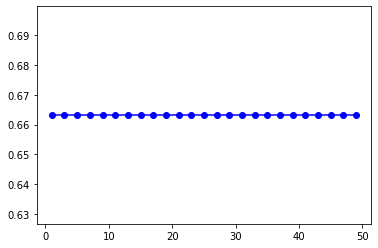

In [162]:
plt.plot(neighbours,cv_scores,'bo-')

# Fine Tuning of Hyperparameters for better performance of the model
* GridSearchCV

In [161]:
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]

hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

clf = GridSearchCV(knn, hyperparameters, cv=10)
best_model = clf.fit(X_train,y_train)

#Best Hyperparameters Value
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
best_model.best_score_

Best leaf_size: 1
Best p: 1
Best n_neighbors: 2


0.7196078431372548

# Model Training

In [107]:
knn = KNeighborsClassifier(n_neighbors=3, leaf_size=1, p=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(leaf_size=1, n_neighbors=3, p=1)

# Model Testing

y_pred=knn.predict(X_test)

In [164]:
y_pred

array([1, 1, 2, 2, 2, 1, 7, 1, 1, 1, 2, 7, 1, 6, 1, 1, 2, 6, 7, 7, 1, 2,
       1, 1, 1, 7, 1, 2, 7, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2],
      dtype=int64)

# Model Evaluation

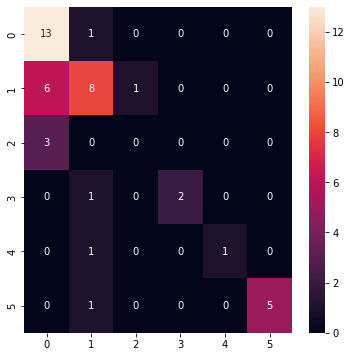

In [109]:
plt.figure(figsize=(6,6))
sn.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.show()

In [110]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.59      0.93      0.72        14
           2       0.67      0.53      0.59        15
           3       0.00      0.00      0.00         3
           5       1.00      0.67      0.80         3
           6       1.00      0.50      0.67         2
           7       1.00      0.83      0.91         6

    accuracy                           0.67        43
   macro avg       0.71      0.58      0.62        43
weighted avg       0.68      0.67      0.66        43



In [112]:
knn.score(X_train,y_train)

0.8654970760233918

In [113]:
knn.score(X_test,y_test)

0.6744186046511628